# Constrained Optimization

In [121]:
import matplotlib.pyplot as plt
import sympy as sp
import matplotlib.patches as patches
from IPython.display import display
from scipy.optimize import minimize
from ipywidgets import interact,interactive
sp.init_printing(order='lex',use_latex='mathjax')

## Plotting Geometric Objects in the Cartesian Plane

In [33]:
# EDIT THIS
# Find your dpi: https://www.infobyip.com/detectmonitordpi.php
# We are working with inches here via scaling by our dpi. 
my_dpi = 96

In [34]:
def createCanvas(width,height,my_dpi):
    fig,ax = plt.subplots(1)
    fig.dpi= my_dpi
    fig.set_size_inches(width,height)
    ax.set_xticks([])
    ax.set_yticks([])
    return fig,ax

def createRectangle( wh, xy, cwch, color="black"):
    """
    All units are in inches. 
    
    Parameters
    ==========
    wh: (width,height) 
    xy: (x,y)
    cwch: (canvasWidth,canvasHeight)
    """
    return patches.Rectangle((xy[0]/cwch[0],xy[1]/cwch[1]),wh[0]/cwch[0],wh[1]/cwch[1],color=color)

def createCheckersBoard(n, captionLoc=False):
    assert n % 2 == 0, 'n is not even'
    canvasSize = (n,n)
    fig,ax = createCanvas(canvasSize[0],canvasSize[1],my_dpi)
    color = "black"
    
    for row in range(n+1):
        for col in range(n+1):
          
            rect = createRectangle((1,1),(col,row),canvasSize,color)
            ax.add_patch(rect)
            
            if captionLoc:
                locStr = "({0},{1})".format(col,row)
                ax.text((row+0.23)/n,(col+0.25)/n,locStr,fontsize=12,color="white")
                
            # Color Oscillation 
            if(color == "black"):
                color = "red"
            else:
                color = "black"
    plt.show()

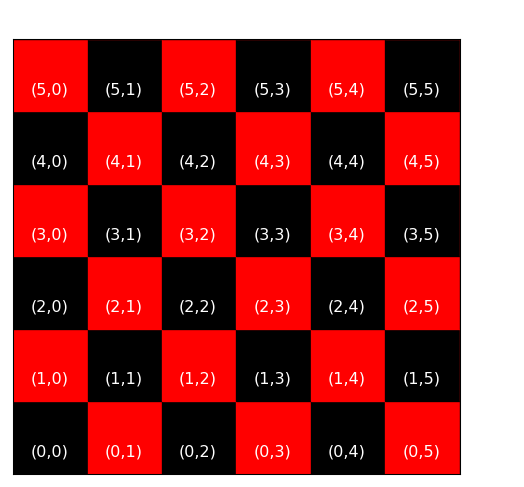

In [39]:
createCheckersBoard(6,True)

## Optimizing Layouts in the Cartesian Plane

In this section we will look at constrained optimization as a way to produce different layouts of objects in the cartesian plane. 

#### Problem 1: Given two objects, place them so they are the farthest apart without an edge of the object passing over the canvas border. 

If we have two objects, the maximum distance they can be from eachother is at the corner of the canvas. For two objects, there are 4 solutions. An example of one solution:

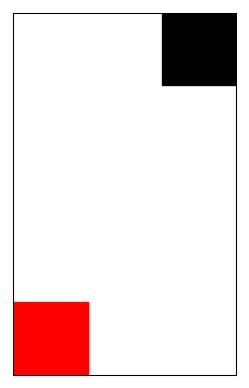

In [82]:
def plotSolution(rect1Loc,rect2Loc,canvasWH):
    fig,ax = createCanvas(canvasWH[0],canvasWH[1],my_dpi)
    ax.add_patch(createRectangle( (1,1), rect1Loc, canvasWH, color="red"))
    ax.add_patch(createRectangle( (1,1), rect2Loc, canvasWH, color="black"))
    plt.show()

canvasWH = (3,5)
plotSolution((0,0),(2,4),canvasWH)

How do we frame this as a constrained optimization problem? We can maximize the euclidean distance or manhattan distance--which makes more sense for grid layouts. We will use the manhattan distance (m):

$$
\large m((x_1,y_1),(x_2,y_2)) = |x_1 - x_2| + |y_1 - y_2|
$$

$$
\large\max_{(x_1,y_1),(x_2,y_2)} m((x_1,y_1),(x_2,y_2))
$$

We will also need to provide boundary constraints, where $w$ is the canvas width and $h$ is the canvas height:

$$
\large\begin{align}
|x_1 - x_2| < w \tag{1} \\
|y_1 - y_2| < h \tag{2}
\end{align}
$$

We can easily turn this into a minimization problem by putting the canvas constraints in the optimization function as follows:

$$
\large\min_{(x_1,y_1),(x_2,y_2)} f((x_1,y_1),(x_2,y_2)) = w-|x_1 - x_2| + h-|y_1 - y_2|
$$

We will also square this function so that we can get rid of the absolute value which is not differentiable at 0. Which gives us the optimization funciton:

$$
\large\min_{(x_1,y_1),(x_2,y_2)} f((x_1,y_1),(x_2,y_2)) = w^2 - (x_1 - x_2)^2 + h^2-(y_1 - y_2)^2 
$$

For implementation purposes, we will assume the function to take a vector as an argument in the form $[x_1,y_1,x_2,y_2]$. Which gives us the final version of the optimization function we will work with: 

$$
\large\min_{x} f(x) = w^2 - (x_0 - x_2)^2 + h^2-(x_1 - x_3)^2 \tag{3}
$$



In [83]:
# [x1,y1,x2,y2]
def f(args):
    return width**2 - (args[0] - args[2])**2  + height**2 - (args[1] - args[3])**2

We will first work with the unit square, 1x1, so we will restrict our solution area to one less so that the squares are not placed right at the boundary. 

In [84]:
bounds = ((0.0,canvasWH[0]-1),(0.0,canvasWH[1]-1),(0.0,canvasWH[0]-1),(0.0,canvasWH[1]-1))

Optimization is very much reliant upon the initial values. In order to get all four solutions, we will need to change where we start 4 times. This can be done in an automated mannor later. Let's start with $ (x_1 = 100, y_1 = 100) \land (x_2 = 0, y_2 =0) $:

In [85]:
init   = [100,100,0,0]
res = minimize(f,init,bounds=bounds,method="TNC")
res

     fun: 14.0
     jac: array([-3.99999998, -7.99999995,  3.99999998,  7.99999995])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 2
     nit: 1
  status: 0
 success: True
       x: array([ 2.,  4.,  0.,  0.])

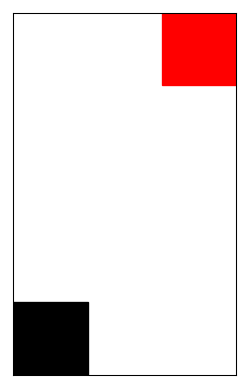

In [86]:
plotSolution((res.x[0],res.x[1]),(res.x[2],res.x[3]),canvasWH)

We will now found the other solutions by changing our initial guess. The following is the symetric solution to the one above. 

In [87]:
init   = [0,0,100,100]
res = minimize(f,init,bounds=bounds,method="TNC")
res

     fun: 14.0
     jac: array([ 3.99999998,  7.99999995, -3.99999998, -7.99999995])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 2
     nit: 1
  status: 0
 success: True
       x: array([ 0.,  0.,  2.,  4.])

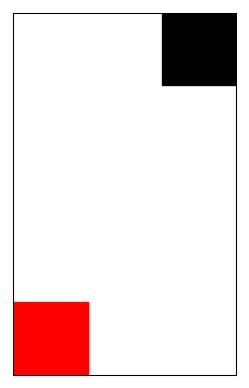

In [88]:
plotSolution((res.x[0],res.x[1]),(res.x[2],res.x[3]),canvasWH)

In [89]:
init   = [100,0,0,100]
res = minimize(f,init,bounds=bounds,method="TNC")
res

     fun: 14.0
     jac: array([-3.99999998,  7.99999995,  3.99999998, -7.99999995])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 2
     nit: 1
  status: 0
 success: True
       x: array([ 2.,  0.,  0.,  4.])

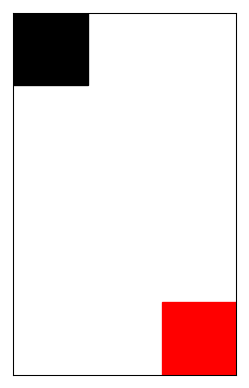

In [90]:
plotSolution((res.x[0],res.x[1]),(res.x[2],res.x[3]),canvasWH)

In [91]:
init   = [0,100,100,0]
res = minimize(f,init,bounds=bounds,method="TNC")
res

     fun: 14.0
     jac: array([ 3.99999998, -7.99999995, -3.99999998,  7.99999995])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 2
     nit: 1
  status: 0
 success: True
       x: array([ 0.,  4.,  2.,  0.])

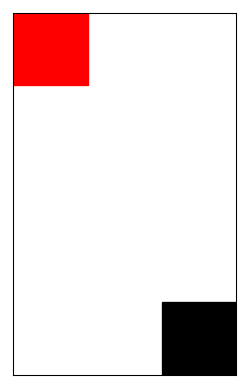

In [92]:
plotSolution((res.x[0],res.x[1]),(res.x[2],res.x[3]),canvasWH)

Exercise: Generalize this to three objects. 

#### Problem 2: Explore how different boundary conditions and initial conditions of the same optimization problem changes the result. 

In [152]:
def exploreParams(ix1=10,iy1=10,ix2=0,iy2=0,x1min=0,x1max=2,y1min=0,y1max=4,x2min=0,x2max=2,y2min=0,y2max=4):
    bounds = ((x1min,x1max),(y1min,y1max),(x2min,x2max),(y2min,y2max))
    init   = [ix1,iy1,ix2,iy2]
    res = minimize(f,init,bounds=bounds,method="TNC")
    plotSolution((res.x[0],res.x[1]),(res.x[2],res.x[3]),canvasWH)

interact(exploreParams,ix1=(0,10),iy1=(0,10),ix2=(0,10),iy2=(0,10),
         x1min=(0,6),x1max=(0,6),y1min=(0,6),y1max=(0,6),
         x2min=(0,6),x2max=(0,6),y2min=(0,6),y2max=(0,6))

interactive(children=(IntSlider(value=10, description='ix1', max=10), IntSlider(value=10, description='iy1', max=10), IntSlider(value=0, description='ix2', max=10), IntSlider(value=0, description='iy2', max=10), IntSlider(value=0, description='x1min', max=6), IntSlider(value=2, description='x1max', max=6), IntSlider(value=0, description='y1min', max=6), IntSlider(value=4, description='y1max', max=6), IntSlider(value=0, description='x2min', max=6), IntSlider(value=2, description='x2max', max=6), IntSlider(value=0, description='y2min', max=6), IntSlider(value=4, description='y2max', max=6), Output()), _dom_classes=('widget-interact',))

<function __main__.exploreParams>

### Exercise: figure out how to generalize this to more objects of heterogeneous shape and size. 